In [1]:
%matplotlib notebook
import numpy as np

import dyrect as dr
from dyrect.data_generators import lemniscate, lorenz_attractor
from dyrect.drawing import *

import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


(109, 2)


<IPython.core.display.Javascript object>


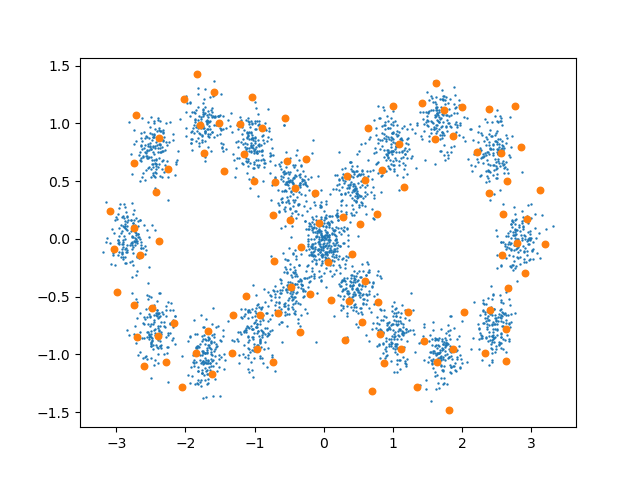

In [2]:
points = lemniscate(3000, scale=2., step=0.1, noise=0.15)

eps=0.25
EN = dr.EpsilonNet(eps, 0)
dists = EN.fit(points)
lms = EN.landmarks
print(lms.shape)

plt.figure()
plt.scatter(points[:,0],points[:,1], s=0.5)
plt.scatter(lms[:,0],lms[:,1], s=21.9)
# print(dists.shape, dists[0])

In [3]:
TM = dr.TransitionMatrix(lms, eps)
transitions = TM.fit(points)
prob_matrix = dr.trans2prob(transitions)

<IPython.core.display.Javascript object>


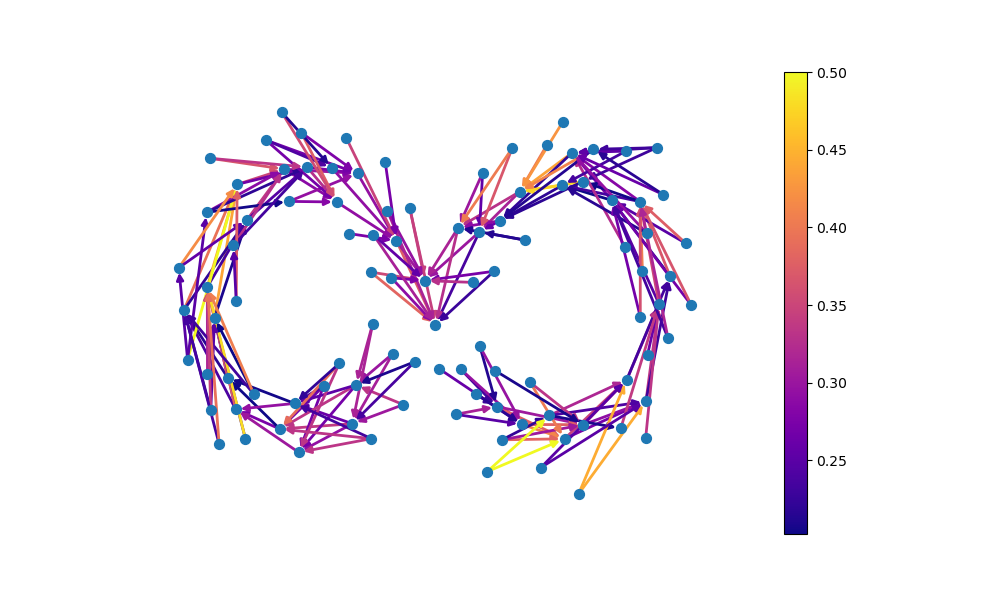

In [4]:
# Questions: 
# how to count transitions? if point is in the intersection of balls, should it contribute to both? 
# if it maps to the the intersection, it should be counted twice? it may create fake backward loops
draw_transition_graph(prob_matrix, lms, threshold=0.2)
plt.show()

<IPython.core.display.Javascript object>


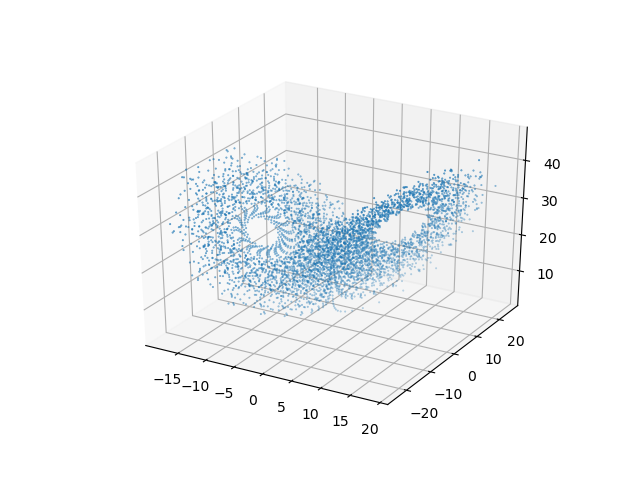

In [5]:
points = lorenz_attractor(5000, step=0.01, adaptive_step=True)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=0.2)

<IPython.core.display.Javascript object>


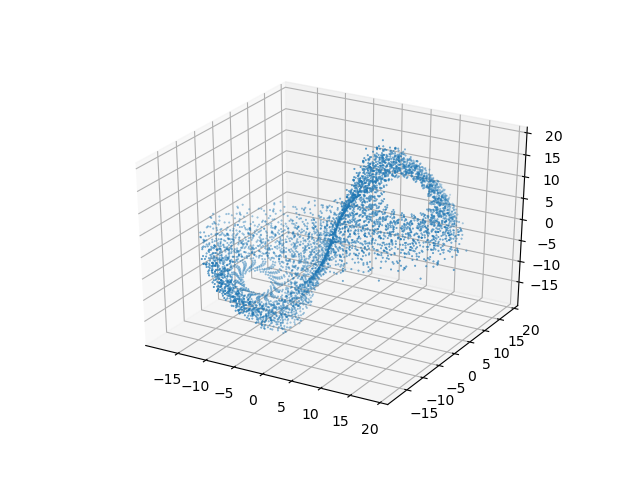

In [6]:
emb_lorenz = dr.embedding(points[:,0], 3, 2)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(emb_lorenz[:,0], emb_lorenz[:,1], emb_lorenz[:,2], s=0.2)

(267, 3)


<IPython.core.display.Javascript object>


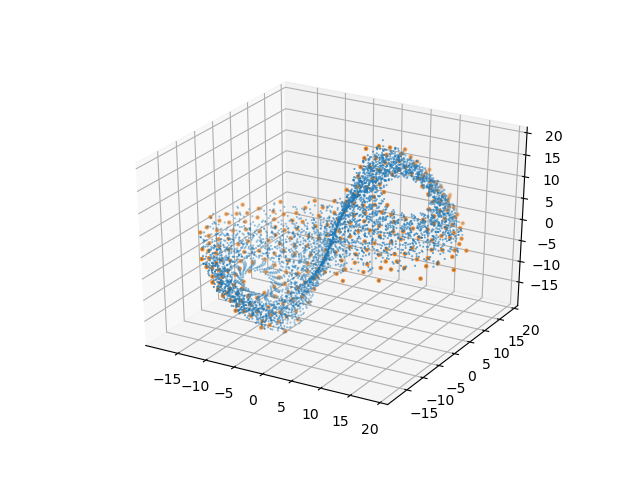

In [7]:
eps=1.5
EN = dr.EpsilonNet(eps, 0)
EN.fit(emb_lorenz)
lms = EN.landmarks
print(lms.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(emb_lorenz[:,0], emb_lorenz[:,1], emb_lorenz[:,2], s=0.2)
ax.scatter(lms[:,0], lms[:,1], lms[:,2], s=5.2)


<IPython.core.display.Javascript object>


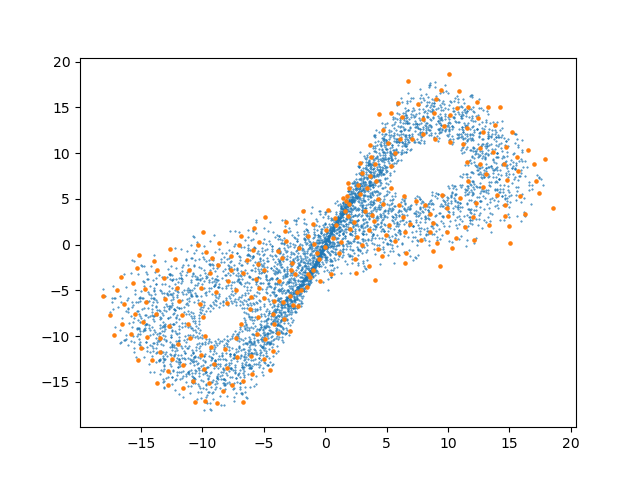

In [8]:
fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
plt.scatter(emb_lorenz[:,0], emb_lorenz[:,1], s=0.2)
plt.scatter(lms[:,0], lms[:,1], s=5.2)

<IPython.core.display.Javascript object>


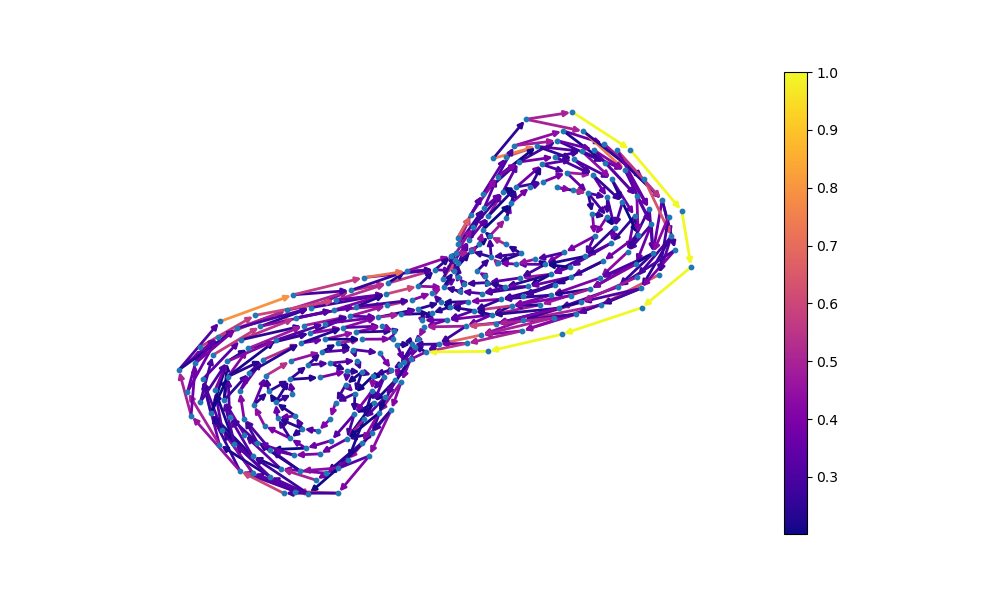

In [9]:
TM = dr.TransitionMatrix(lms, eps)
transitions = TM.fit(emb_lorenz)
prob_matrix = dr.trans2prob(transitions)

# Questions: 
# how to count transitions? if point is in the intersection of balls, should it contribute to both? 
# if it maps to the the intersection, it should be counted twice? it may create fake backward loops
draw_transition_graph(prob_matrix, lms, threshold=0.2, node_size=10, edge_size=8)
plt.show()

## Future prediction

(119, 3)


<IPython.core.display.Javascript object>


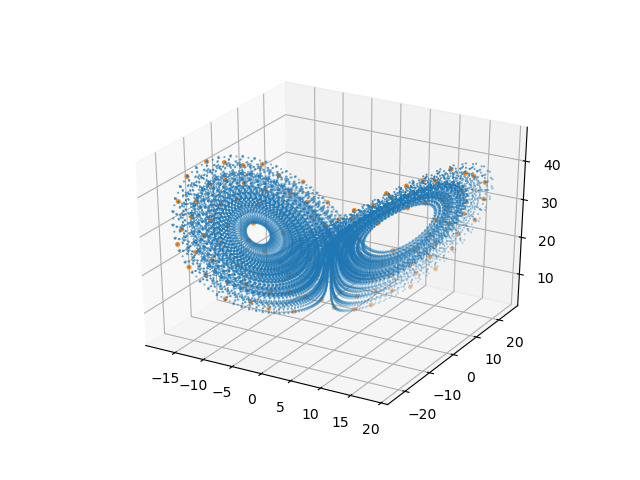

In [11]:
train_points = lorenz_attractor(20000, step=0.01, adaptive_step=False, starting_point=[1.,1.,1.])
test_points = lorenz_attractor(5000, step=0.01, adaptive_step=False, starting_point=[-1.,-1.,1.])

eps=3.5
EN = dr.EpsilonNet(eps, 0)
dists = EN.fit(train_points)
lms = EN.landmarks
print(lms.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(train_points[:,0], train_points[:,1], train_points[:,2], s=0.2)
ax.scatter(lms[:,0], lms[:,1], lms[:,2], s=7.2)

In [12]:
seer = dr.Seer(train_points, lms, eps)

076-076-076-032-032-032-061-061-061-104.{400}


<IPython.core.display.Javascript object>


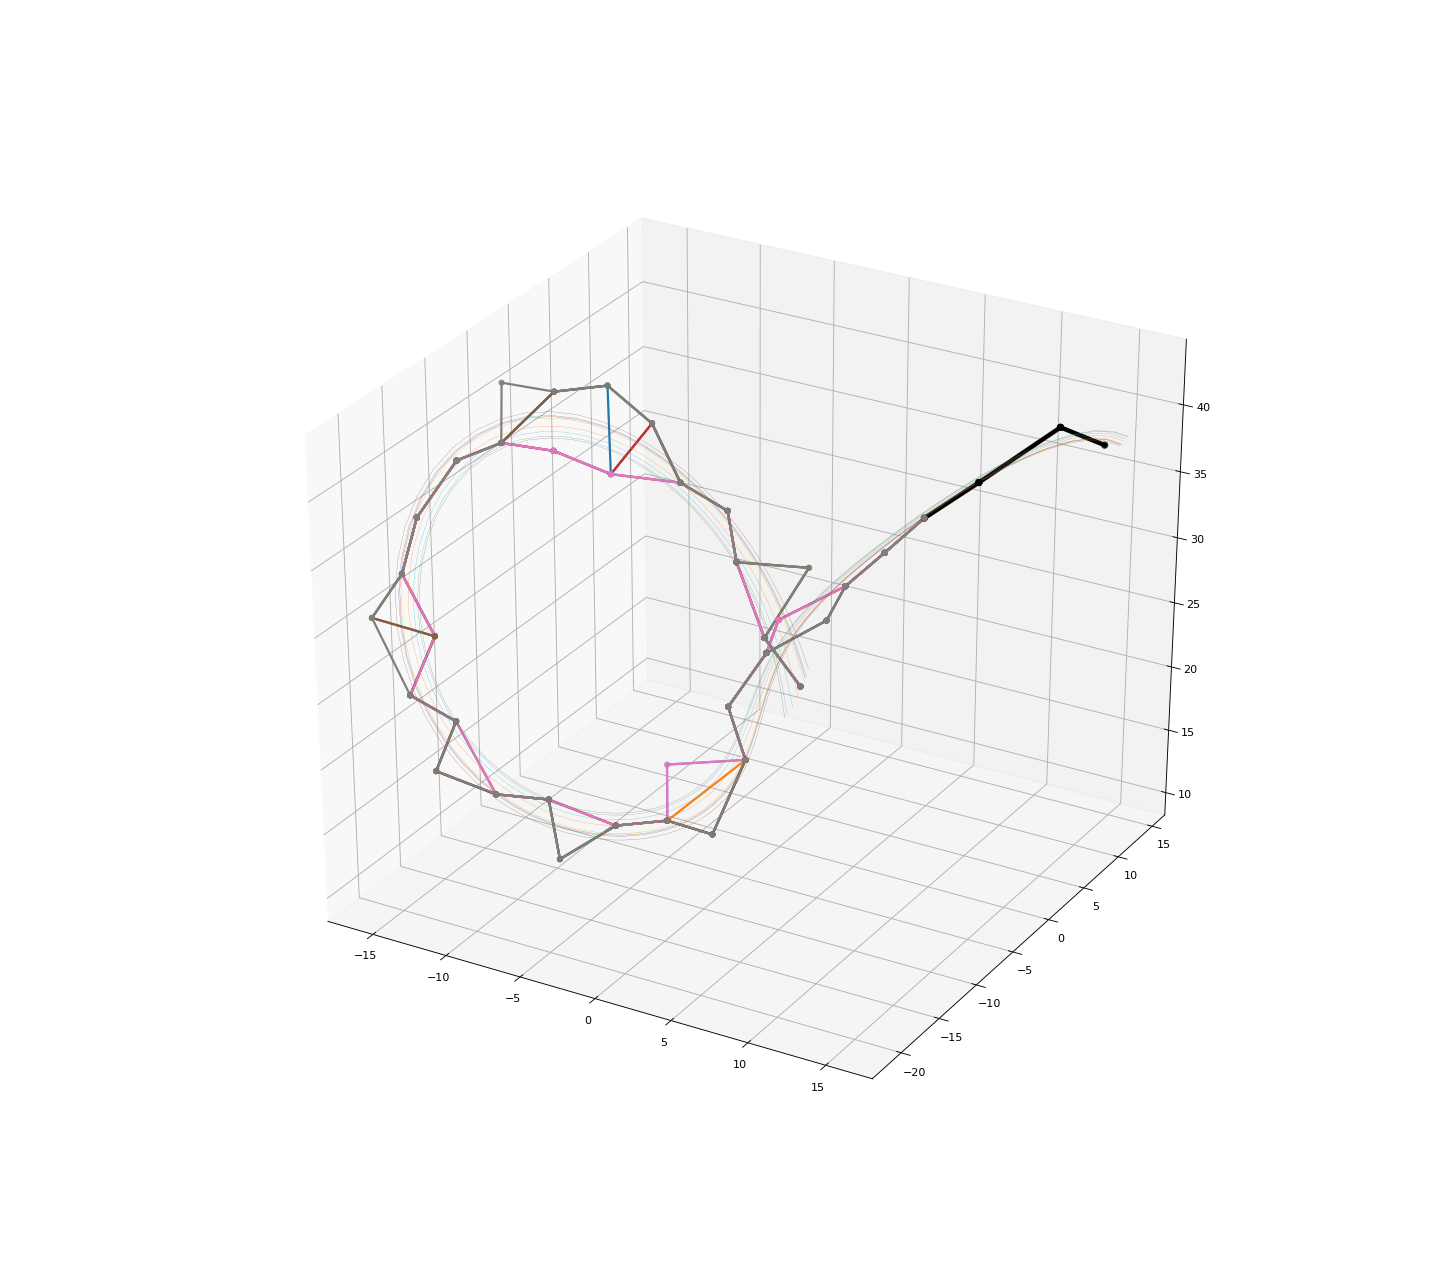

Counter({'-104-073-073-073-026-026-026-026-117-117-117-028-028-028-028-028-028-028-048-048-048-048-048-048-048-027-027-027-027-027-027-027-027-027-027-027-027-027-010-010-010-010-022-022-022-022-022-022-055-055-055-055-055-008-093-093-093-046-046-004-100-100-066-066-054-116-116-043-043-043-067-067-044-044-019-019-099-015-033-033-080-080-080-041-041-042-042-042-042-042-009-009-009-009-009-009-036-036-036-036': 1,
         '-104-073-073-073-026-026-026-026-023-023-023-028-028-028-028-028-028-028-048-048-048-048-048-048-048-048-027-027-027-027-027-027-027-027-027-027-022-022-022-022-022-022-022-022-022-055-055-055-055-055-093-093-093-046-046-046-100-100-100-066-054-054-116-116-043-043-043-067-067-044-044-098-098-098-015-015-080-080-080-080-041-041-042-042-042-042-042-009-009-009-009-009-009-009-036-036-036-036-036-036': 1,
         '-104-073-073-073-026-026-026-026-117-117-117-028-028-028-028-028-028-028-048-048-048-048-048-048-048-027-027-027-027-027-027-027-027-027-027-027-027-027-010-0

In [30]:
t0 = 2500
t1 = t0 + 10
seer.predict(test_points[t0:t1], 100, draw=True)